# <span style="color:#0000aa">MPO624 final project: Dropsondes </span>

<span style="color:green">Victoria Pizzini</span>

Spring 2022 

[Jump to conclusions](#conclusions)

# This cell is marked as a "Skip" slide                  

# This cell is marked as "Notes" 

### These slideshow markers are only seeable in http://localhost:8888/tree 

### Not in http://localhost:8888/lab (Jupyter Lab)

- **localhost:8888/tree** is what you get when you launch `jupyter notebook` instead of `jupyter lab` 

- but you can also manually enter it in another browser tab while using **localhost:888/lab**

# Next slide - see how you could skip the sub-slide?


## What is a Sub-slide?

- A sub-slide appears below the main slide

- You can optionally skip it during presentation by using right-arrow 

- a little navigation icon at lower right shows you it exists 

## What is a *fragment*? 

This fragment appears after one click on its main slide 

## In this way, a readable notebook can also be a presentation

### "literate programming" (notebook) is also "presentation programming" 

## Style is needed! 

   

*Jupyter is not just an environment for hacking out an answer in code!* 

<a id="conclusions"></a>

# Conclusions

- My project was based on (idea) suggested by exploration of the data


- (data) were used to estimate (finding) as a test of that idea

    - finding2, finding3


- The result is significant: credible-interval limits exclude (null hypothesis)


- This workflow, presentation, and writeup are available on my GitHub page: https://github.com/xxxxx




**Questions? Contact me at:**


- Name - contact info 

In [1]:
#Tracks of Larry, Ida, and Sam
#First, we import Tropycal and its key components: "tracks", "tornado", and "recon"
from tropycal import tracks, tornado, recon
import numpy as np
from datetime import datetime as dt,timedelta

#For the purposes of this talk, we'll be ignoring warnings from functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
basin = tracks.TrackDataset('north_atlantic',include_btk=True)

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (13.21 seconds)
--> Starting to read in best track data
--> Completed reading in best track data (0.37 seconds)


In [3]:
print(basin)

<tropycal.tracks.Dataset>
Dataset Summary:
    Basin:             north_atlantic
    Source:            hurdat
    Number of storms:  1936
    Maximum wind:      165 knots (Allen 1980)
    Minimum pressure:  882 hPa (Wilma 2005)
    Year range:        1851 — 2021


<AxesSubplot:title={'left':'2020 North Atlantic Accumulated Cyclone Energy '}>

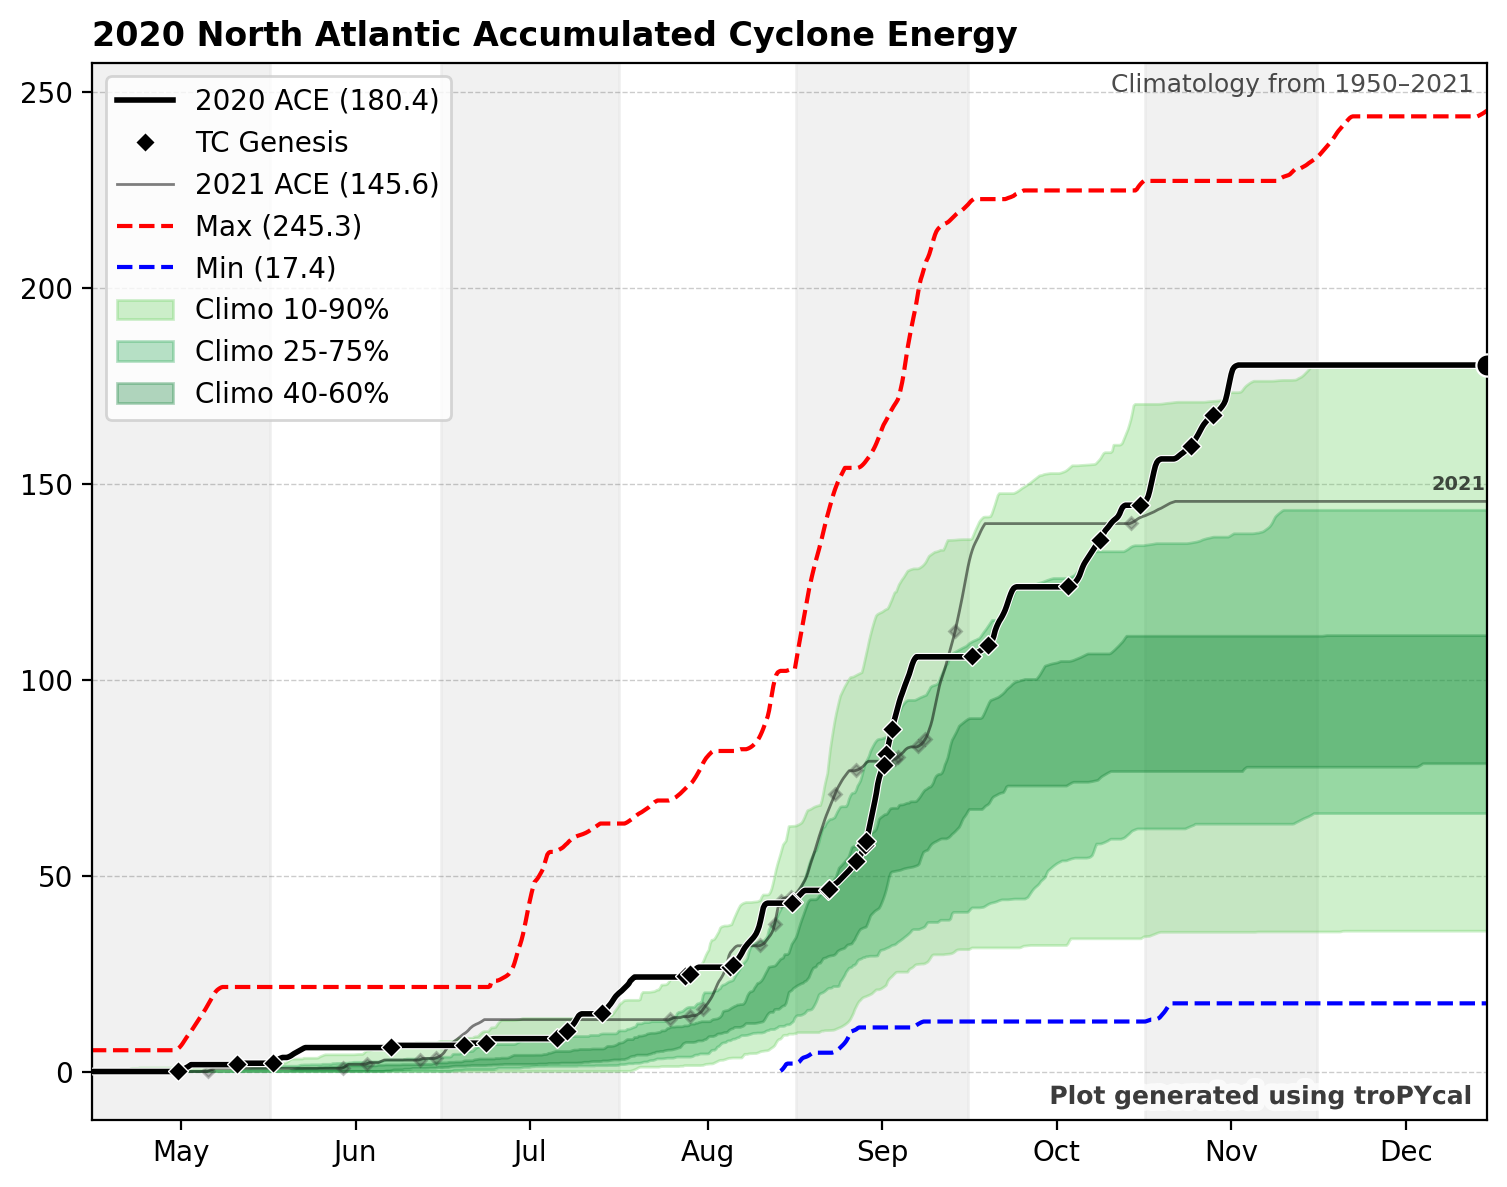

In [4]:
basin.ace_climo(2020,compare_years=(2021))

In [5]:
#Retrieve the 2020 Atlantic hurricane season
season = basin.get_season(2021)

#Check the season content
print(season)

<tropycal.tracks.Season>
Season Summary:
    Total Storms:      21
    Named Storms:      21
    Hurricanes:        7
    Major Hurricanes:  4
    Season ACE:        145.3

More Information:
    year:          2021
    basin:         north_atlantic
    source_basin:  north_atlantic
    source:        hurdat
    source_info:   NHC Hurricane Database


In [6]:
season.to_dataframe()

,id,name,vmax,mslp,category,ace,start_time,end_time,start_lat,start_lon
0,AL012021,ANA,40,1004,0,0.8,2021-05-22 06:00:00,2021-05-23 12:00:00,34.2,-62.1
1,AL022021,BILL,55,992,0,1.0,2021-06-14 06:00:00,2021-06-15 18:00:00,33.2,-75.9
2,AL032021,CLAUDETTE,40,1003,0,1.1,2021-06-19 00:00:00,2021-06-22 00:00:00,28.4,-91.2
3,AL042021,DANNY,40,1009,0,0.4,2021-06-27 18:00:00,2021-06-29 00:00:00,29.8,-72.8
4,AL052021,ELSA,75,991,1,9.9,2021-06-30 18:00:00,2021-07-09 16:30:00,9.4,-42.8
5,AL062021,FRED,55,991,0,2.4,2021-08-11 00:00:00,2021-08-17 18:00:00,17.3,-66.1
6,AL072021,GRACE,105,967,3,8.6,2021-08-13 06:00:00,2021-08-21 12:00:00,15.0,-46.7
7,AL082021,HENRI,65,986,1,7.8,2021-08-15 18:00:00,2021-08-23 12:00:00,34.1,-62.7
8,AL092021,IDA,130,929,4,10.6,2021-08-26 12:00:00,2021-09-01 06:00:00,16.5,-78.9
9,AL102021,KATE,40,1004,0,0.6,2021-08-28 06:00:00,2021-09-01 12:00:00,13.7,-49.8


<GeoAxesSubplot:title={'left':'2021 Atlantic Hurricane Season','right':'21 named • 7 hurricanes • 4 major\n145.3 Cumulative ACE'}>

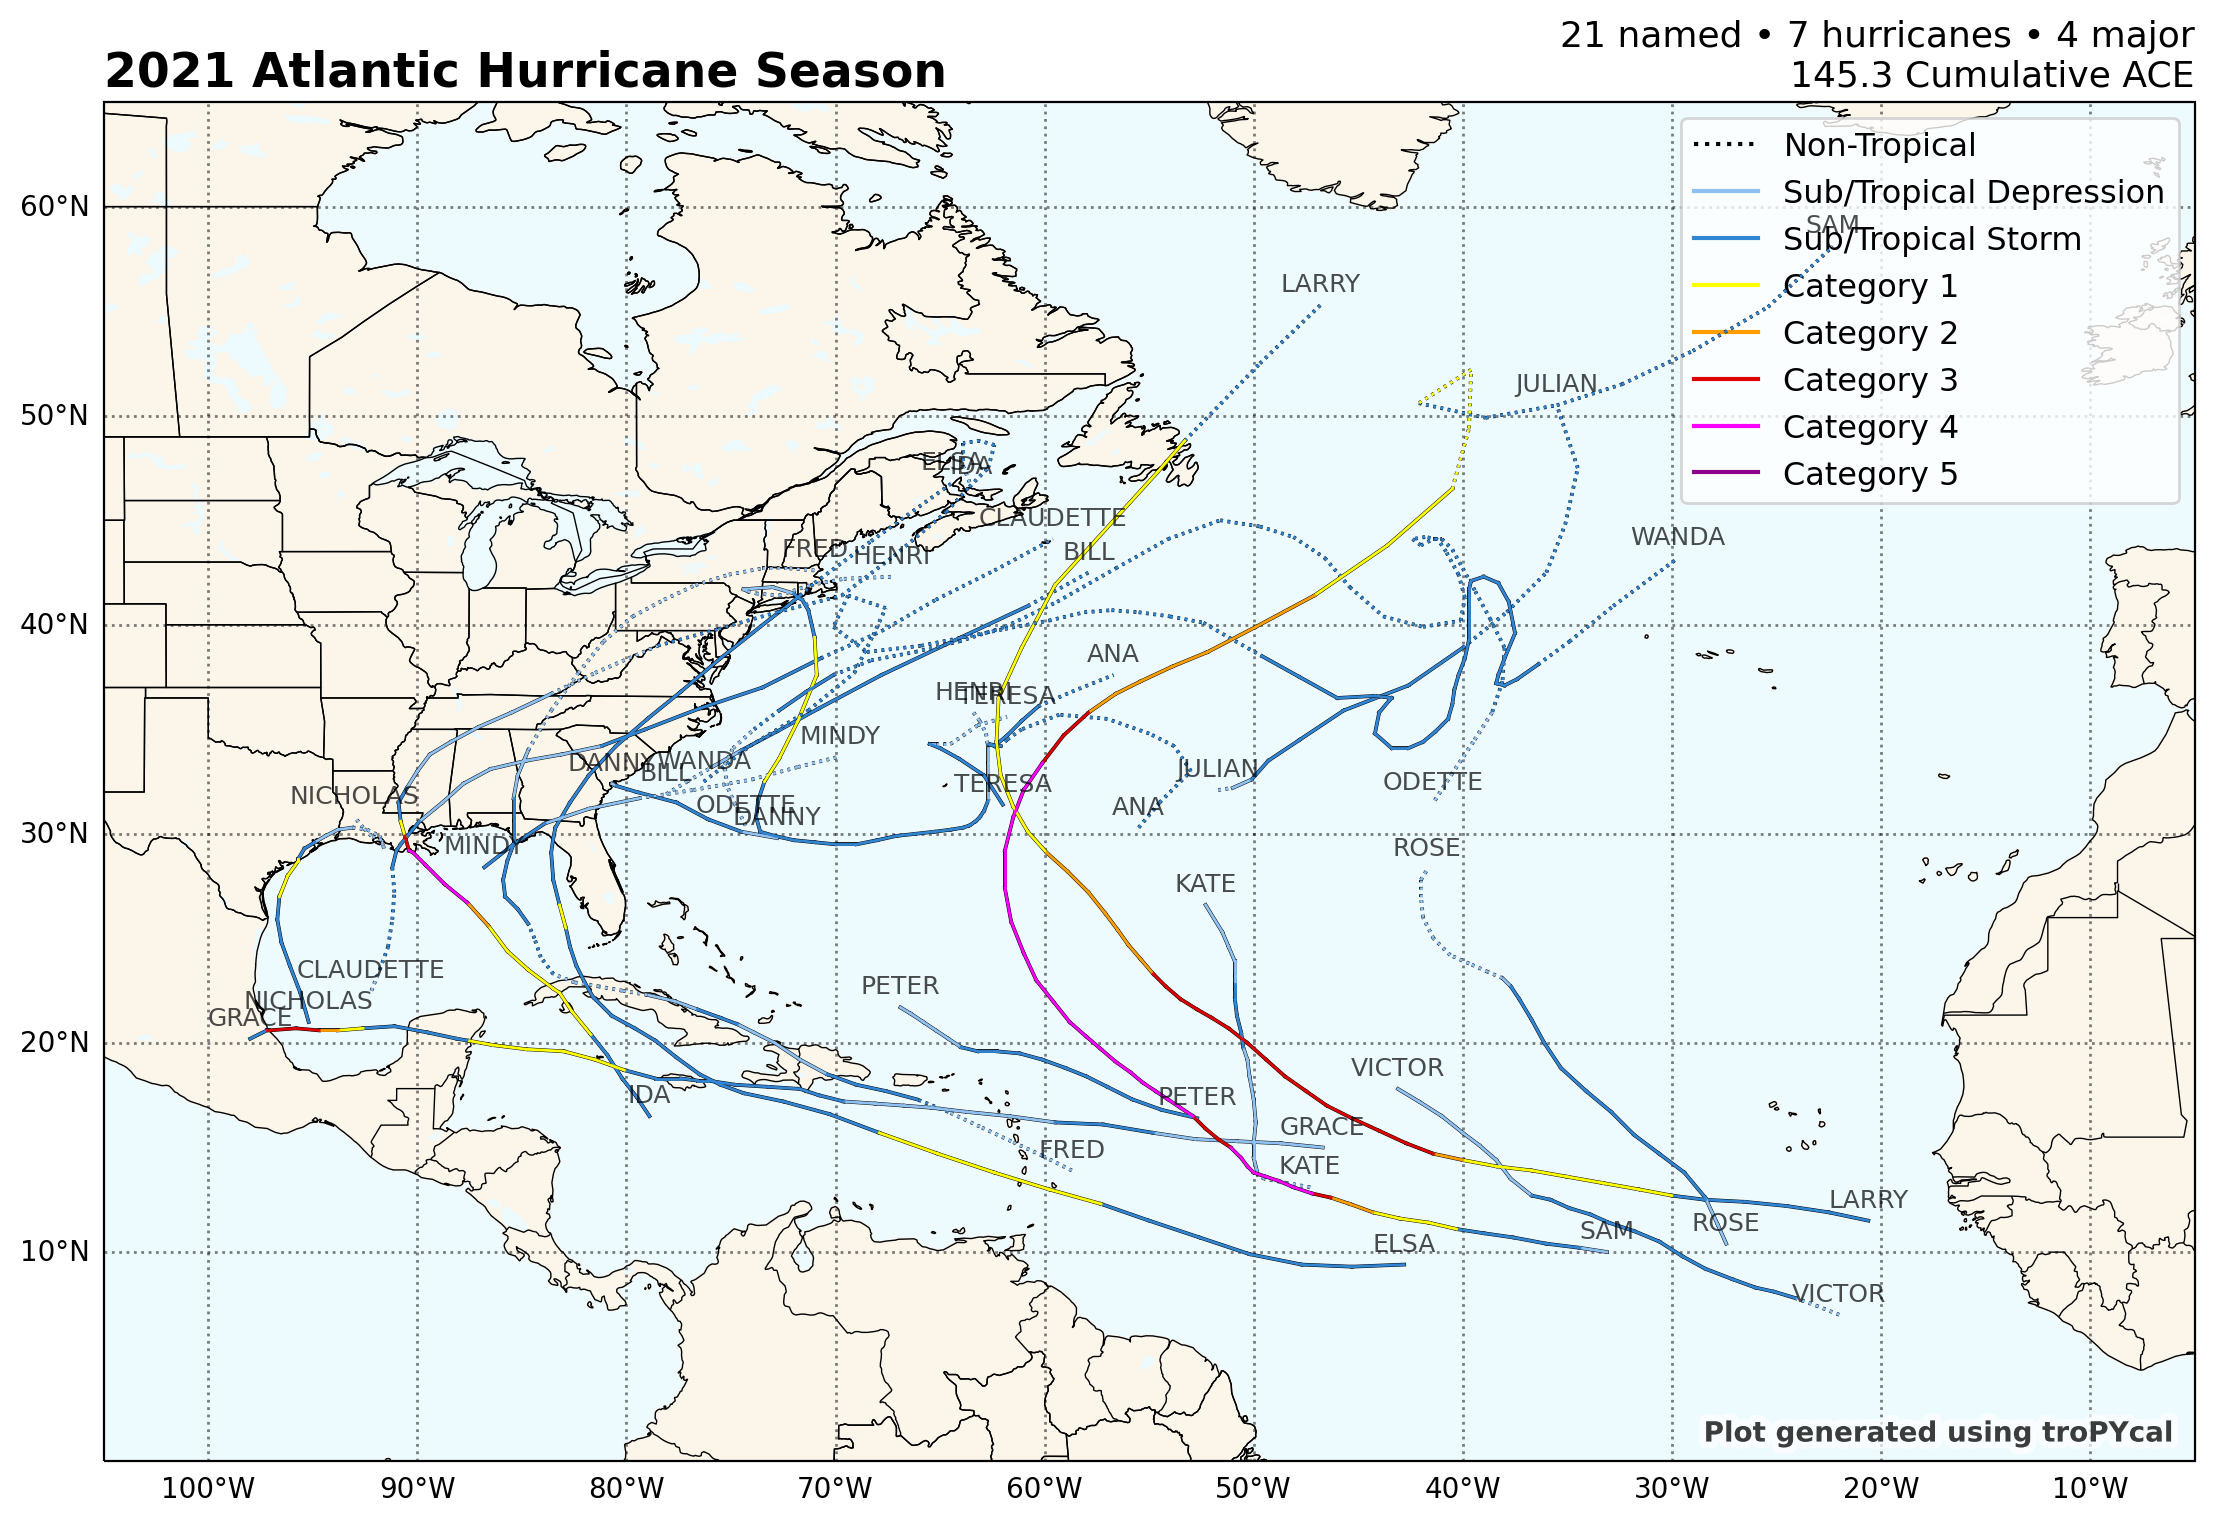

In [7]:
season.plot()

In [8]:
storm = basin.get_storm(('Larry',2021))
print(storm)

<tropycal.tracks.Storm>
Storm Summary:
    Maximum Wind:      110 knots
    Minimum Pressure:  953 hPa
    Start Date:        1800 UTC 31 August 2021
    End Date:          0600 UTC 11 September 2021

Variables:
    date        (datetime) [2021-08-31 18:00:00 .... 2021-09-11 18:00:00]
    extra_obs   (int32) [0 .... 0]
    special     (str) [ .... ]
    type        (str) [TD .... EX]
    lat         (float64) [11.5 .... 55.3]
    lon         (float64) [-20.6 .... -46.8]
    vmax        (int32) [30 .... 55]
    mslp        (int32) [1006 .... 967]
    wmo_basin   (str) [north_atlantic .... north_atlantic]

More Information:
    id:              AL122021
    operational_id:  AL122021
    name:            LARRY
    year:            2021
    season:          2021
    basin:           north_atlantic
    source_info:     NHC Hurricane Database
    source:          hurdat
    ace:             31.9
    realtime:        False
    invest:          False


In [9]:
storm.to_dataframe()

,date,extra_obs,special,type,lat,lon,vmax,mslp,wmo_basin
0,2021-08-31 18:00:00,0,,TD,11.5,-20.6,30,1006,north_atlantic
1,2021-09-01 00:00:00,0,,TS,11.9,-22.5,35,1005,north_atlantic
2,2021-09-01 06:00:00,0,,TS,12.2,-24.5,40,1004,north_atlantic
3,2021-09-01 12:00:00,0,,TS,12.4,-26.5,45,1003,north_atlantic
4,2021-09-01 18:00:00,0,,TS,12.5,-28.4,55,999,north_atlantic
5,2021-09-02 00:00:00,0,,TS,12.7,-30.0,60,996,north_atlantic
6,2021-09-02 06:00:00,0,,HU,13.0,-31.6,65,991,north_atlantic
7,2021-09-02 12:00:00,0,,HU,13.3,-33.3,70,987,north_atlantic
8,2021-09-02 18:00:00,0,,HU,13.6,-35.0,70,987,north_atlantic
9,2021-09-03 00:00:00,0,,HU,13.9,-36.7,75,985,north_atlantic


In [10]:
print(storm.to_xarray())

<xarray.Dataset>
Dimensions:    (time: 46)
Coordinates:
  * time       (time) datetime64[ns] 2021-08-31T18:00:00 ... 2021-09-11T18:00:00
Data variables:
    extra_obs  (time) int32 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 1 0 0 0
    special    (time) <U1 '' '' '' '' '' '' '' '' ... '' '' '' '' 'L' '' '' ''
    type       (time) <U2 'TD' 'TS' 'TS' 'TS' 'TS' ... 'HU' 'HU' 'HU' 'EX' 'EX'
    lat        (time) float64 11.5 11.9 12.2 12.4 12.5 ... 47.3 48.8 52.5 55.3
    lon        (time) float64 -20.6 -22.5 -24.5 -26.5 ... -53.3 -49.7 -46.8
    vmax       (time) int32 30 35 40 45 55 60 65 70 ... 75 70 70 70 70 65 60 55
    mslp       (time) int32 1006 1005 1004 1003 999 996 ... 958 958 959 963 967
    wmo_basin  (time) <U14 'north_atlantic' ... 'north_atlantic'
Attributes:
    id:              AL122021
    operational_id:  AL122021
    name:            LARRY
    year:            2021
    season:          2021
    basin:           north_atlantic
    source_info:     NHC Hurricane Databa

<GeoAxesSubplot:title={'left':'Hurricane LARRY','right':'31 Aug 2021 – 11 Sep 2021\n110 kt • 953 hPa • 31.9 ACE'}>

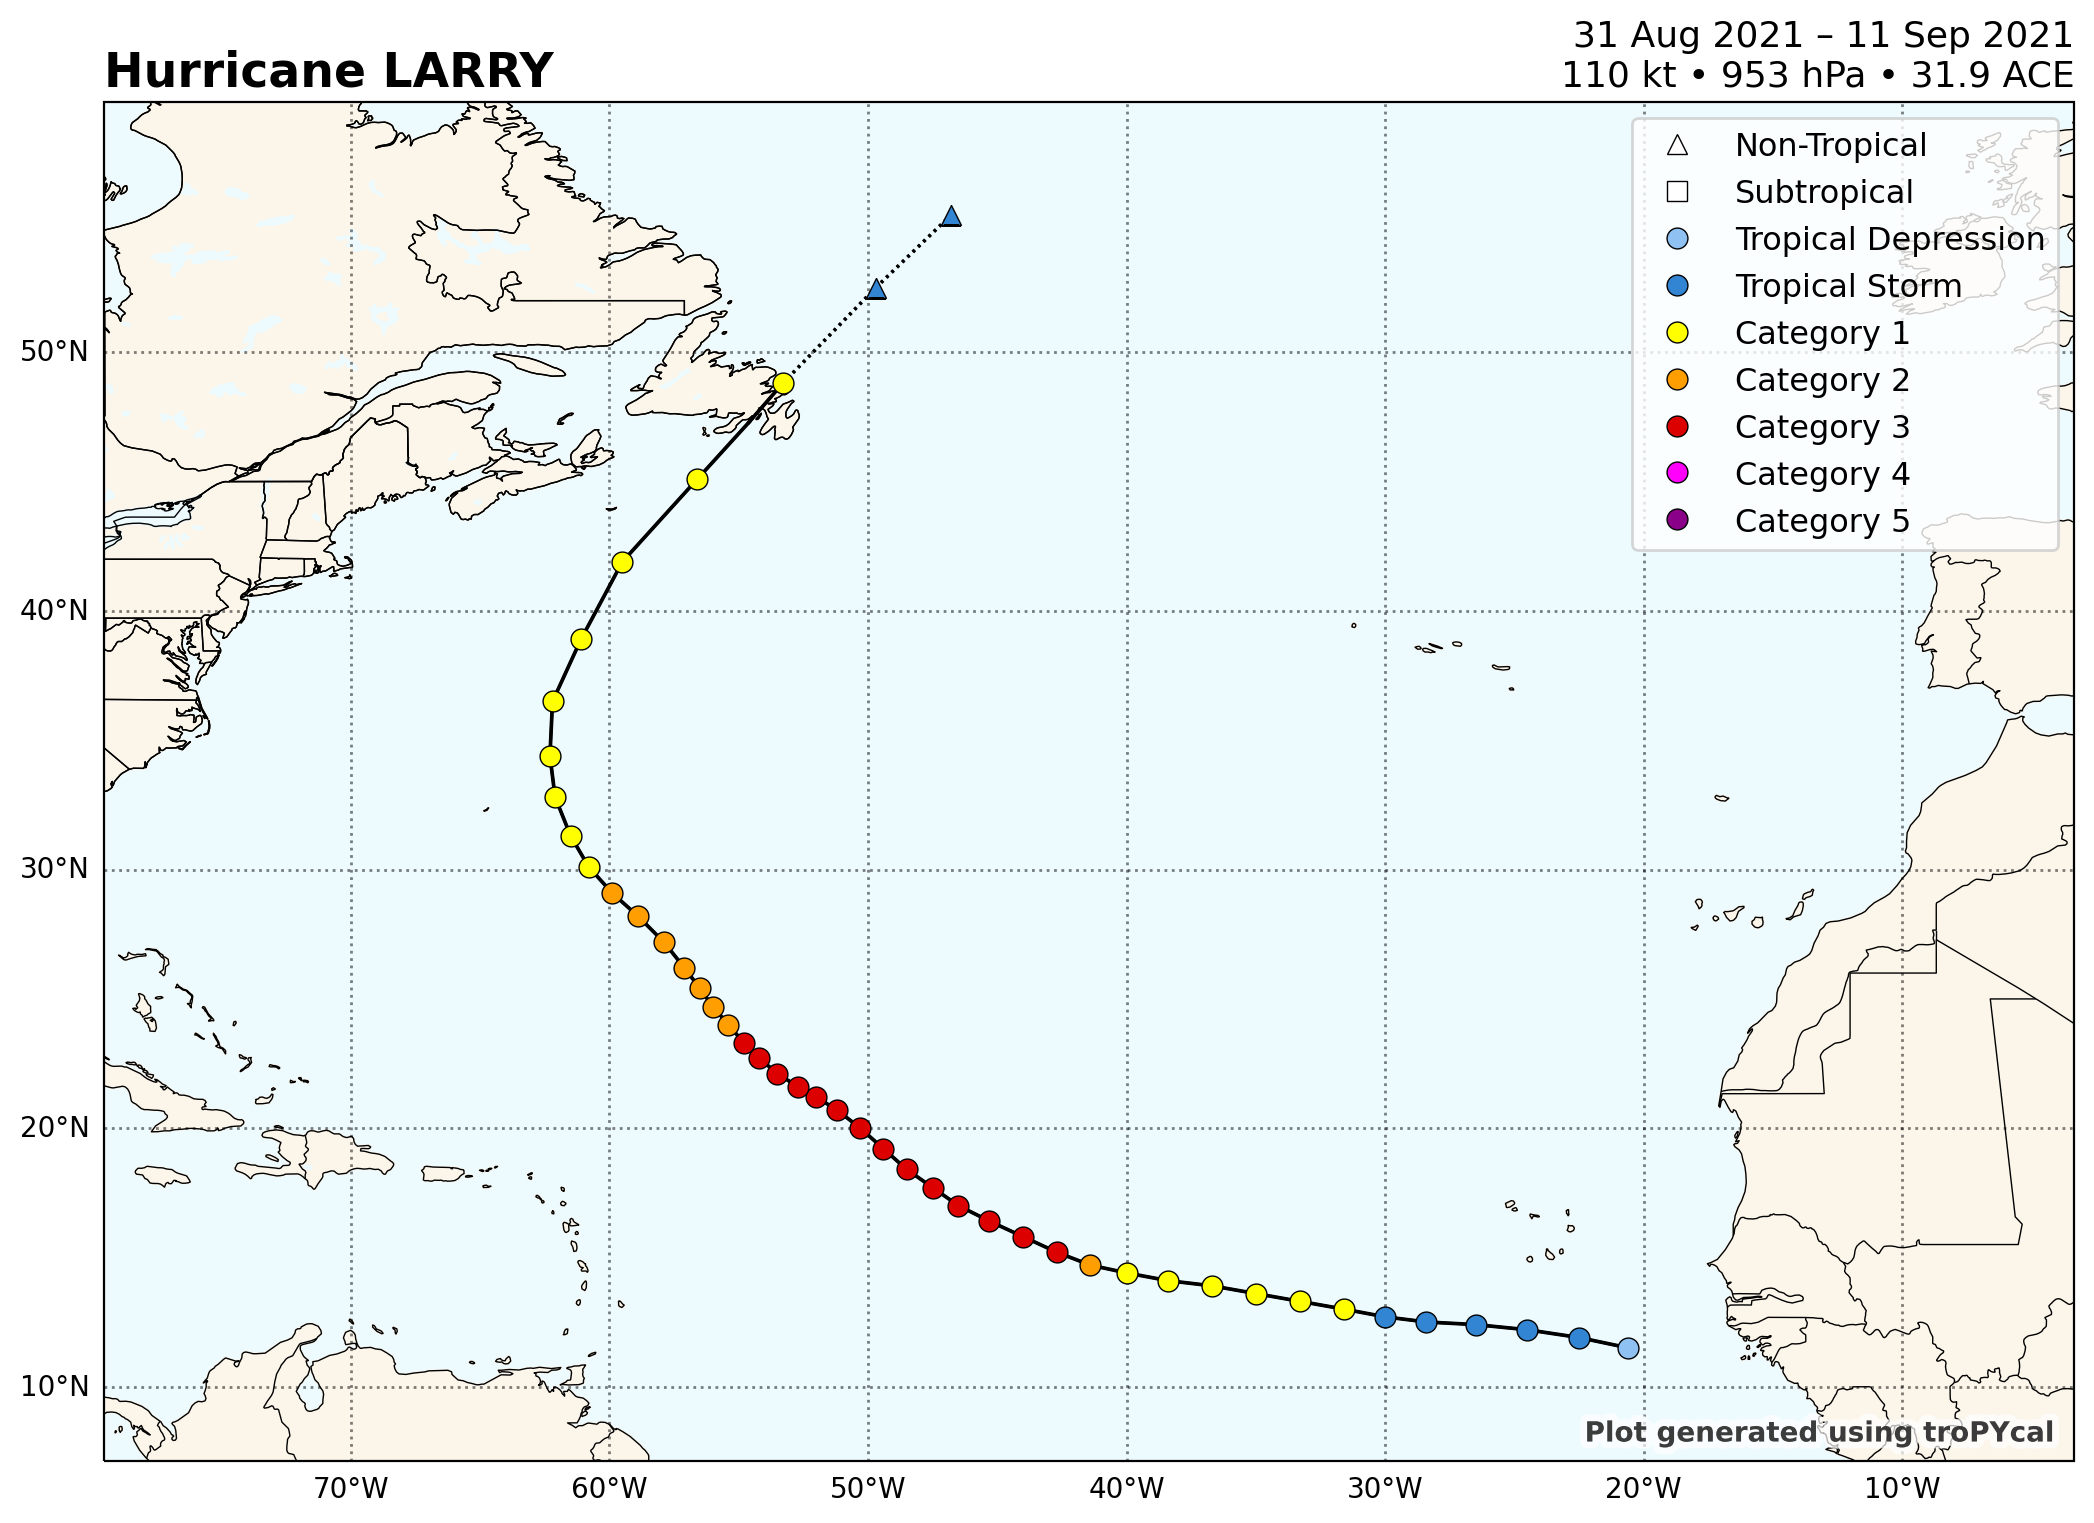

In [11]:
storm.plot()

In [12]:
storm = basin.get_storm(('Sam',2021))
print(storm)

<tropycal.tracks.Storm>
Storm Summary:
    Maximum Wind:      135 knots
    Minimum Pressure:  927 hPa
    Start Date:        1800 UTC 22 September 2021
    End Date:          0000 UTC 05 October 2021

Variables:
    date        (datetime) [2021-09-22 18:00:00 .... 2021-10-07 06:00:00]
    extra_obs   (int32) [0 .... 0]
    special     (str) [ .... ]
    type        (str) [TD .... EX]
    lat         (float64) [10.0 .... 58.1]
    lon         (float64) [-33.1 .... -22.3]
    vmax        (int32) [30 .... 40]
    mslp        (int32) [1008 .... 976]
    wmo_basin   (str) [north_atlantic .... north_atlantic]

More Information:
    id:              AL182021
    operational_id:  AL182021
    name:            SAM
    year:            2021
    season:          2021
    basin:           north_atlantic
    source_info:     NHC Hurricane Database
    source:          hurdat
    ace:             54.0
    realtime:        False
    invest:          False


<GeoAxesSubplot:title={'left':'Hurricane SAM','right':'22 Sep 2021 – 05 Oct 2021\n135 kt • 927 hPa • 54.0 ACE'}>

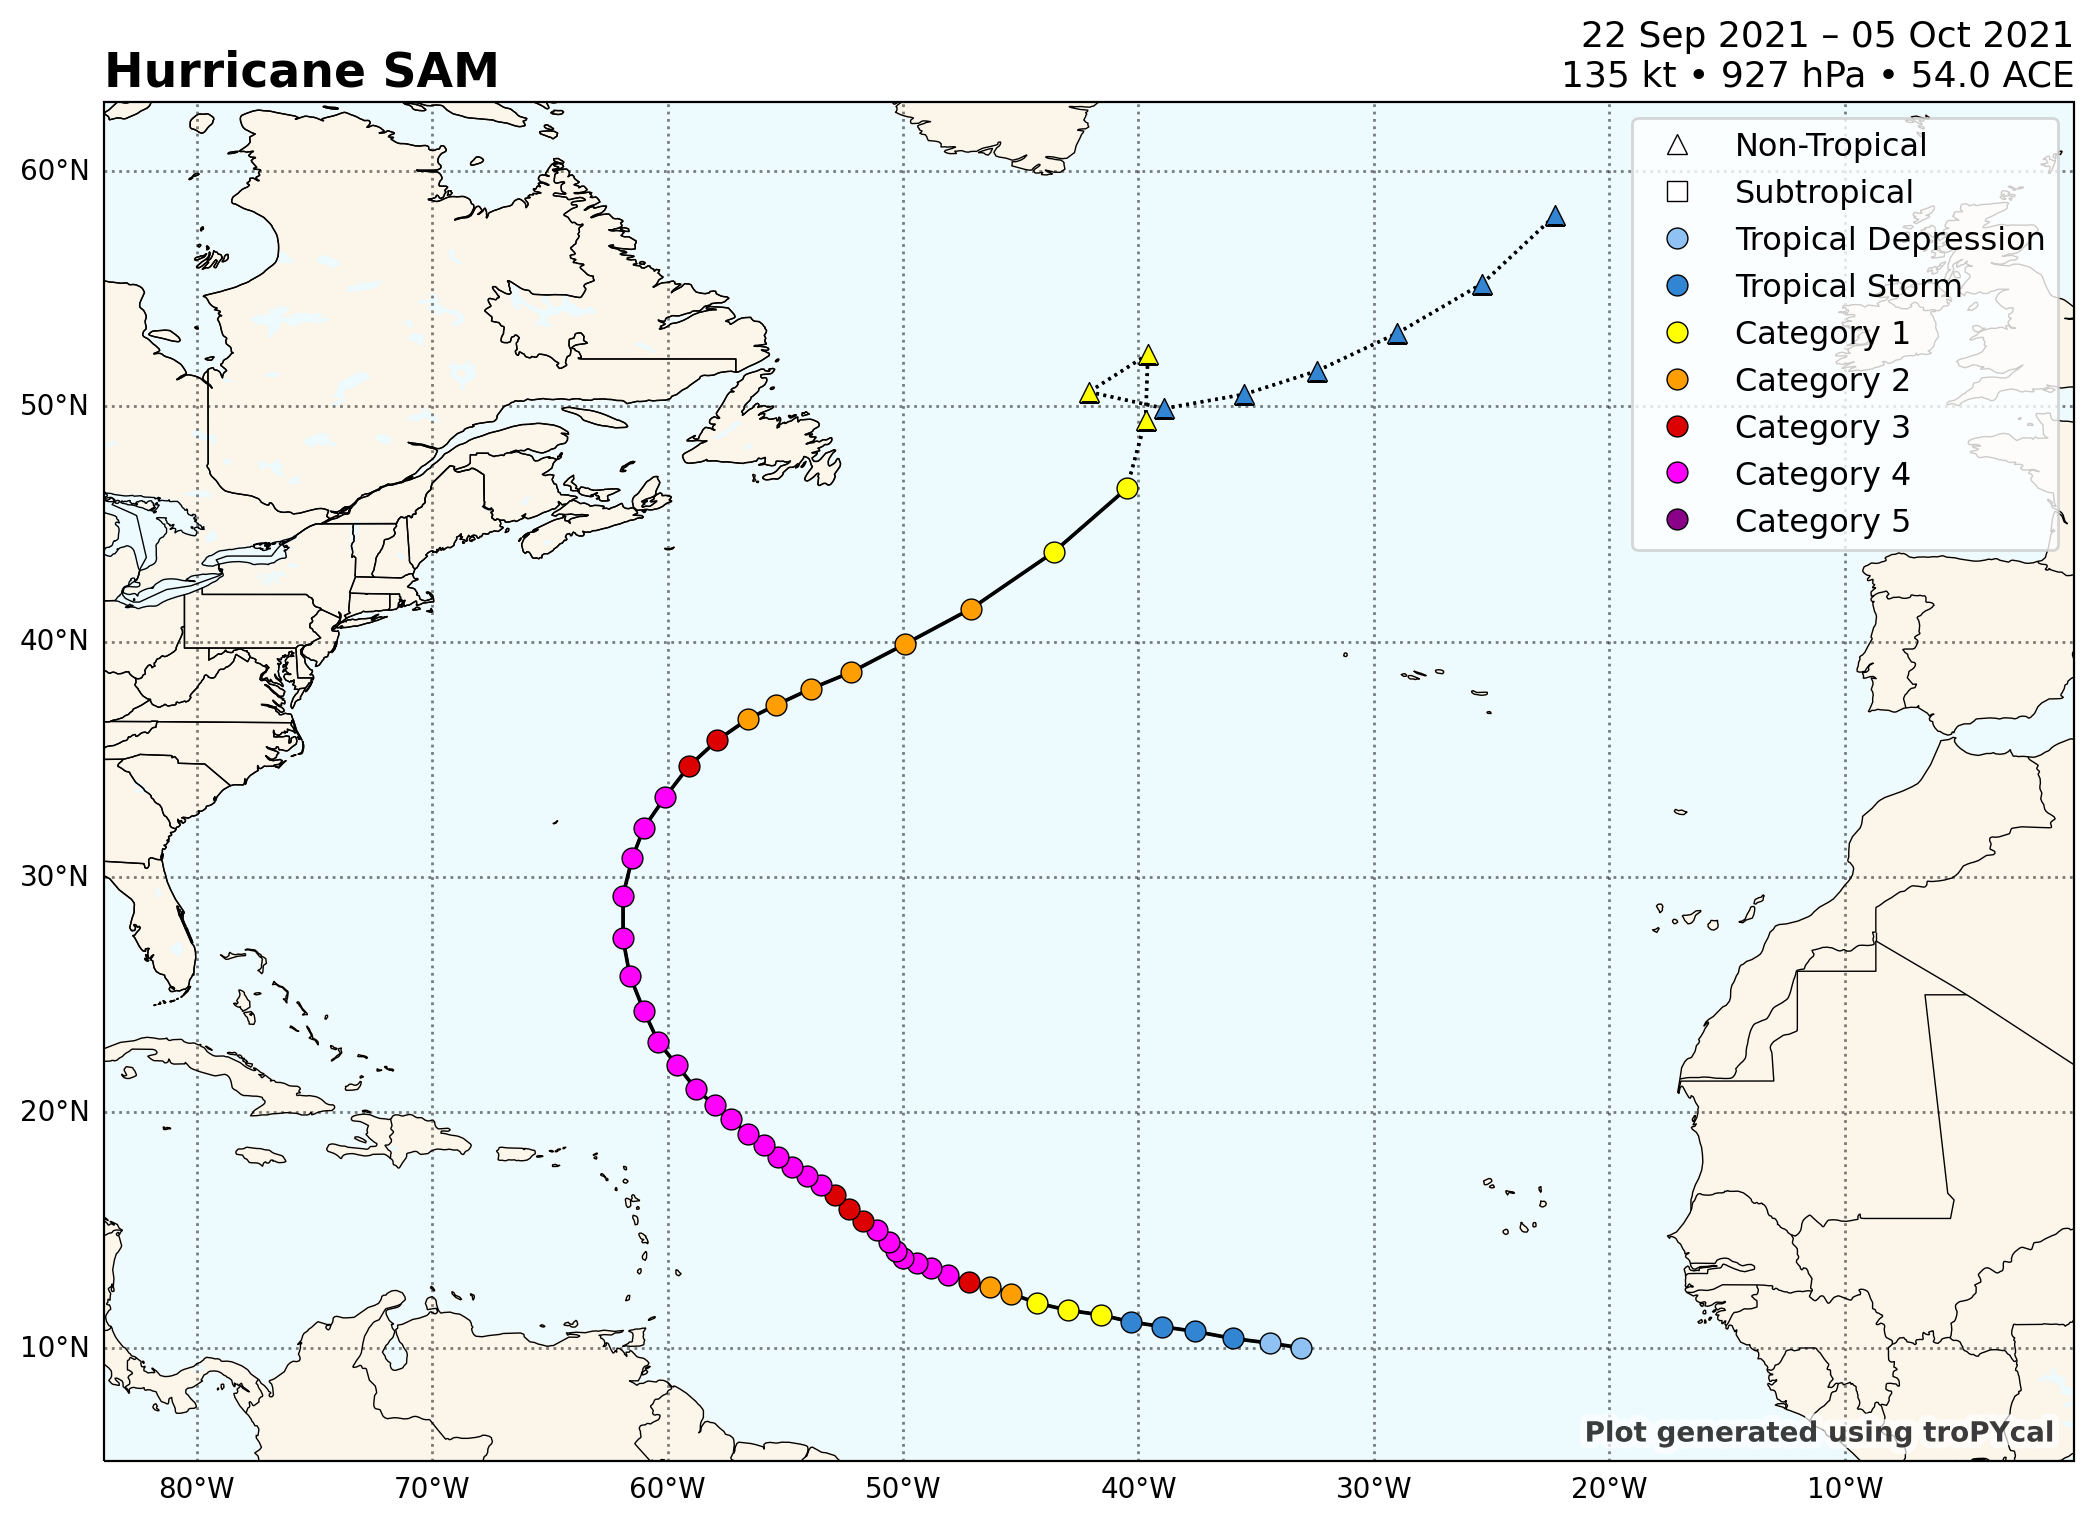

In [13]:
storm.plot()

In [14]:
storm = basin.get_storm(('Ida',2021))
print(storm)

<tropycal.tracks.Storm>
Storm Summary:
    Maximum Wind:      130 knots
    Minimum Pressure:  929 hPa
    Start Date:        1200 UTC 26 August 2021
    End Date:          0600 UTC 01 September 2021

Variables:
    date        (datetime) [2021-08-26 12:00:00 .... 2021-09-04 18:00:00]
    extra_obs   (int32) [0 .... 0]
    special     (str) [ .... ]
    type        (str) [TD .... EX]
    lat         (float64) [16.5 .... 46.6]
    lon         (float64) [-78.9 .... -63.5]
    vmax        (int32) [30 .... 30]
    mslp        (int32) [1006 .... 999]
    wmo_basin   (str) [north_atlantic .... north_atlantic]

More Information:
    id:              AL092021
    operational_id:  AL092021
    name:            IDA
    year:            2021
    season:          2021
    basin:           north_atlantic
    source_info:     NHC Hurricane Database
    source:          hurdat
    ace:             10.6
    realtime:        False
    invest:          False


<GeoAxesSubplot:title={'left':'Hurricane IDA','right':'26 Aug 2021 – 01 Sep 2021\n130 kt • 929 hPa • 10.6 ACE'}>

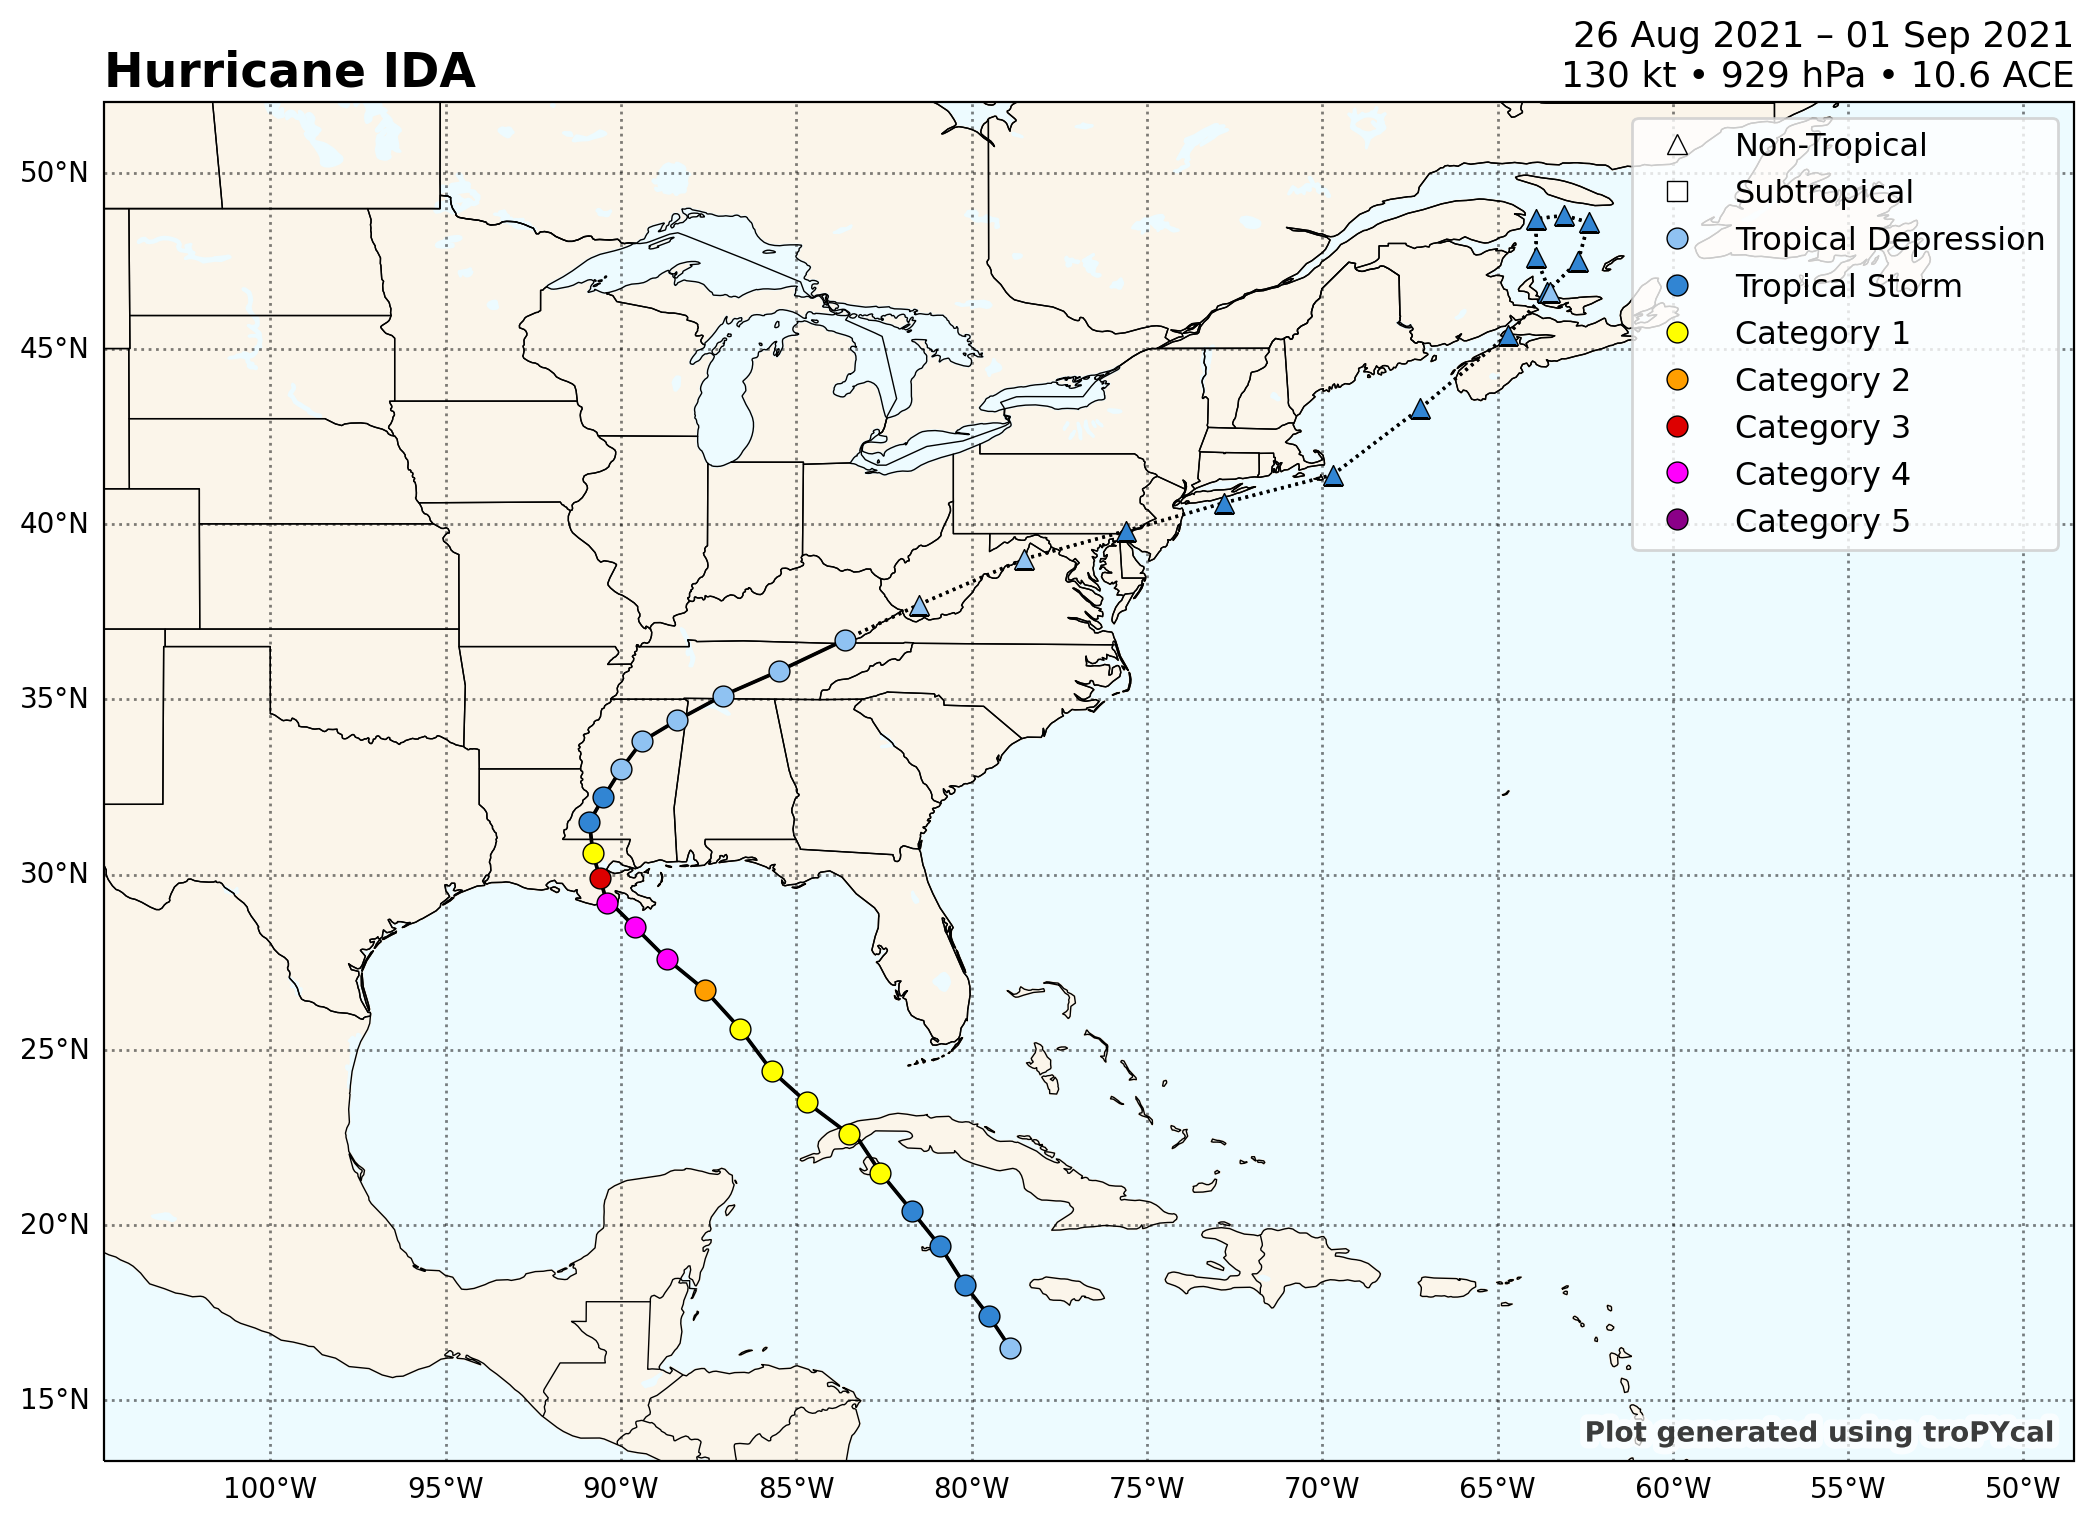

In [15]:
storm.plot()

In [31]:
import plotly.express as px
import glob
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import metpy

FOLDERNAME = 'https://www.aoml.noaa.gov/ftp/hrd/data/flightlevel/2021/larry/20210905H1.1sec.txt'
cnames = ['TIME','Lat', 'Lon', 'Head', 'Track', 'GnSpd', 'TAS', 'GeoAl', 'Press', 'WndDr', 'wndSpd','Tempr', 'Dewpt','D Val',  'RdAlt', 'MixR', 'VtWnd', 'SfcPr', 'ThetaE']

In [32]:
drops=[]
for file_name in glob.glob(FOLDERNAME):
    # print(file_name)
    drop = pd.read_csv(file_name)
    drops.append(drop)

In [34]:
alldrops = pd.concat(drops)

O_F = alldrops.T_C - alldrops.GFS6T
O_A = alldrops.T_C - alldrops.GFS0T
A_F = alldrops.GFS0T - alldrops.GFS6T

ValueError: No objects to concatenate